In [20]:
import os
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
from sklearn.model_selection import train_test_split

np.set_printoptions(suppress=True)  #<- suppress scientific notations

In [21]:
df = pd.read_csv('../Capstone/Full Dataset.csv',index_col=0)

In [26]:
feature_list = ['AST','TRB','FG%','FT%','TOV','STL','BLK','PTS','Pos']

# pos_to_num_map = {'PG':1,'SG':2,'SF':3,'PF':4,'C':5}
df = df[(df['MP'] > 0) & (df['G'] > 0) & (df['PTS'] > 0)]
df_subset = df[feature_list].copy()
# df_subset.Pos = df_subset.Pos.map(pos_to_num_map)
df_subset.loc[:,'Pos'] = pd.Categorical(df_subset.loc[:,'Pos'])

df.shape
df

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,OBPM,DBPM,BPM,VORP,Year_x,MVP_Rank,MVP_First,MVP_Pts Won,MVP_Pts Max,MVP_Share
0,Kareem Abdul-Jabbar,5,32,LAL,82,0,38.3,10.2,16.9,0.604,...,4.8,2.4,7.2,7.3,1980,1.0,147.0,147.0,221.0,0.665
1,Tom Abernethy,4,25,GSW,67,0,18.2,2.3,4.7,0.481,...,-1.0,-0.2,-1.2,0.2,1980,0.0,0.0,0.0,0.0,0.000
2,Alvan Adams,5,25,PHO,75,0,28.9,6.2,11.7,0.531,...,1.7,1.9,3.6,3.1,1980,0.0,0.0,0.0,0.0,0.000
3,Tiny Archibald,1,31,BOS,80,80,35.8,4.8,9.9,0.482,...,1.4,-0.3,1.1,2.3,1980,5.0,2.0,2.0,221.0,0.009
4,Dennis Awtrey,5,31,CHI,26,0,21.5,1.0,2.3,0.450,...,-2.3,0.9,-1.4,0.1,1980,0.0,0.0,0.0,0.0,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18259,Thaddeus Young,4,33,TOT,52,1,16.3,2.7,5.2,0.518,...,0.1,2.1,2.2,0.9,2022,0.0,0.0,0.0,0.0,0.000
18260,Trae Young,1,23,ATL,76,76,34.9,9.4,20.3,0.460,...,7.1,-2.0,5.2,4.8,2022,0.0,0.0,0.0,0.0,0.000
18261,Omer Yurtseven,5,23,MIA,56,12,12.6,2.3,4.4,0.526,...,-1.4,0.4,-1.0,0.2,2022,0.0,0.0,0.0,0.0,0.000
18262,Cody Zeller,5,29,POR,27,0,13.1,1.9,3.3,0.567,...,-1.2,-1.0,-2.1,0.0,2022,0.0,0.0,0.0,0.0,0.000


In [27]:
X = df_subset.drop('Pos',axis=1)
y = df_subset.Pos

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [31]:
scaler = StandardScaler()
df_subset_scaled = scaler.fit_transform(df_subset)


df_subset_scaled = pd.DataFrame(df_subset_scaled, columns = df_subset.columns)
df_subset

,AST,TRB,FG%,FT%,TOV,STL,BLK,PTS,Pos
0,4.5,10.8,0.604,0.765,3.6,1.0,3.4,24.8,5
1,1.3,2.9,0.481,0.683,0.6,0.5,0.2,5.4,4
2,4.3,8.1,0.531,0.797,2.9,1.4,0.7,14.9,5
3,8.4,2.5,0.482,0.830,3.0,1.3,0.1,14.1,1
4,1.5,4.4,0.450,0.640,1.0,0.5,0.6,3.3,5
...,...,...,...,...,...,...,...,...,...
18259,2.0,4.0,0.518,0.469,1.0,1.0,0.3,6.2,4
18260,9.7,3.7,0.460,0.904,4.0,0.9,0.1,28.4,1
18261,0.9,5.3,0.526,0.623,0.7,0.3,0.4,5.3,5
18262,0.8,4.6,0.567,0.776,0.7,0.3,0.2,5.2,5


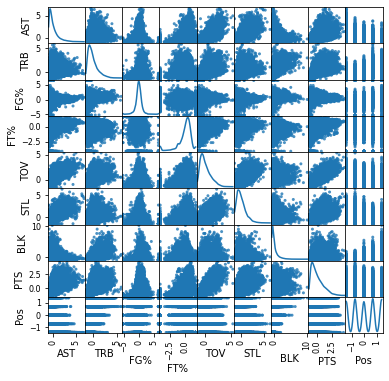

In [32]:
scatter_m = scatter_matrix(df_subset_scaled,
                           alpha = 0.8,
                           figsize = (6, 6),
                           diagonal = 'kde')
plt.show()



In [36]:
dbscan = DBSCAN(eps=0.4, min_samples = 7)
clusters = dbscan.fit_predict(df_subset_scaled)

# Check the number of clusters
unique, counts = np.unique(clusters, return_counts=True)
print(np.asarray((unique, counts)).T)

[[   -1 17351]
 [    0   135]
 [    1    10]
 [    2    96]
 [    3    42]
 [    4    15]
 [    5    52]
 [    6     7]
 [    7    16]
 [    8     7]
 [    9    29]
 [   10    10]
 [   11    25]
 [   12     7]
 [   13    11]
 [   14    11]
 [   15     9]
 [   16    15]
 [   17    39]
 [   18     9]
 [   19    25]
 [   20     7]
 [   21     7]
 [   22     7]
 [   23     6]
 [   24    16]
 [   25     7]
 [   26     7]
 [   27     7]
 [   28     6]
 [   29    20]
 [   30     6]
 [   31     5]
 [   32     8]
 [   33     9]
 [   34     7]
 [   35     8]
 [   36     8]
 [   37     8]
 [   38     5]]


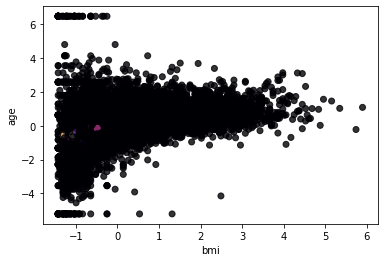

In [40]:
plt.scatter(df_subset_scaled['TRB'],
            df_subset_scaled['FG%'],
            alpha = 0.8,
            cmap = 'magma',
            c = clusters)
plt.xlabel('TRB')
plt.ylabel('FG%')
plt.show()

In [42]:
n_trainingData = 0
labels = 0
n_clusters = 0

def Get_distanceMean(points,minPts,previous_distanceMean):

  if (minPts < len(points)):
      nbrs = NearestNeighbors(n_neighbors=minPts).fit(points)
      distances, indices = nbrs.kneighbors(points)
      d_mean = distances.mean()
      return d_mean
  else:
      return previous_distanceMean

In [43]:
def kNNdist_plot(points,minPts):
  epsPlot = []
  current_distanceMean = previous_distanceMean = 0
  knee_value = knee_found = 0
  for i in range (0,len(points),5):
      current_distanceMean = Get_distanceMean(points[i:],minPts,previous_distanceMean)
      df = current_distanceMean - previous_distanceMean
      if ((df > 0.02) & (i > 1) & (knee_found == 0)):
          knee_value = current_distanceMean
          knee_found = 1
          n_trainingData = i
      epsPlot.append( [i,current_distanceMean] )
      previous_distanceMean = current_distanceMean
  # Plot the kNNdistPlot.
  for i in range(0, len(epsPlot)):
      plt.scatter(epsPlot[i][0],epsPlot[i][1],c='r',s=3,marker='o')
  plt.axhline(y=knee_value, color='g', linestyle='-')
  plt.axvline(x=n_trainingData , color='g', linestyle='-')
  plt.title("kNN distance")
  return plt, n_trainingData, knee_value


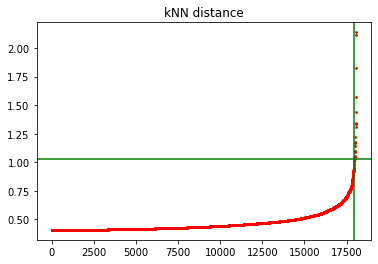

1.0280698950037184


In [ ]:
plt, n_trainingData,  best_eps = kNNdist_plot(df_subset_scaled, 7)
plt.show()
print(best_eps)

In [ ]:
dbscan = DBSCAN(eps=best_eps, min_samples = 7)
optimized_clusters = dbscan.fit_predict(df_subset_scaled)

unique, counts = np.unique(optimized_clusters, return_counts=True)
print(np.asarray((unique, counts)).T)

In [ ]:
df_subset_scaled['optimized_clusters'] = optimized_clusters
df_subset_scaled = df_subset_scaled[df_subset_scaled.optimized_clusters >-1]
optimized_clusters = df_subset_scaled['optimized_clusters']
df_subset_scaled

NameError: name 'optimized_clusters' is not defined

In [ ]:
plt.scatter(df_subset_scaled['TRB'],
            df_subset_scaled['FG%'],
            alpha = 0.8,
            cmap = 'magma',
            c = optimized_clusters)
plt.xlabel('TRB')
plt.ylabel('FG%')
plt.show()